## 1. Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, precision_score,auc,precision_recall_curve,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score   
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

## 2. Importing dataset 

In [3]:
data = pd.read_csv('Portuguese_banking.csv')

## 3. Exploratory Data Analysis (EDA)

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [5]:
data.shape

(32950, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [8]:
# get the unqiue values for each column
for i in data.columns:
    print("\033[1m" + i+ "\033[0m", '⟹' , data[i].unique())
    print()

age ⟹ [49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]

job ⟹ ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']

marital ⟹ ['married' 'divorced' 'single' 'unknown']

education ⟹ ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']

default ⟹ ['unknown' 'no' 'yes']

housing ⟹ ['no' 'yes' 'unknown']

loan ⟹ ['no' 'yes' 'unknown']

contact ⟹ ['cellular' 'telephone']

month ⟹ ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']

day_of_week ⟹ ['wed' 'mon' 'tue' 'fri' 'thu']

duration ⟹ [ 227  202 1148 ... 1882 1666 1434]

campaign ⟹ [ 4  2  1  5  9  3  7  6 13  8 12 10 19 11 31 17 16 29 43 20 14 21 35 15
 33 28 22 25 18 23 27 26 24 34 32 37 30 

In [9]:
# Descriptive statistics descriptions for numerical data
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [10]:
# Descriptive statistics descriptions for categorical data
data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


### Duplicate  

In [131]:
# Checking duplicate rows
data.duplicated().sum()

8

In [4]:
data.drop_duplicates(inplace = True)   # remove duplicate rows

### Missing values

In [13]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### Outliers

### Boxplots

<AxesSubplot:xlabel='duration'>

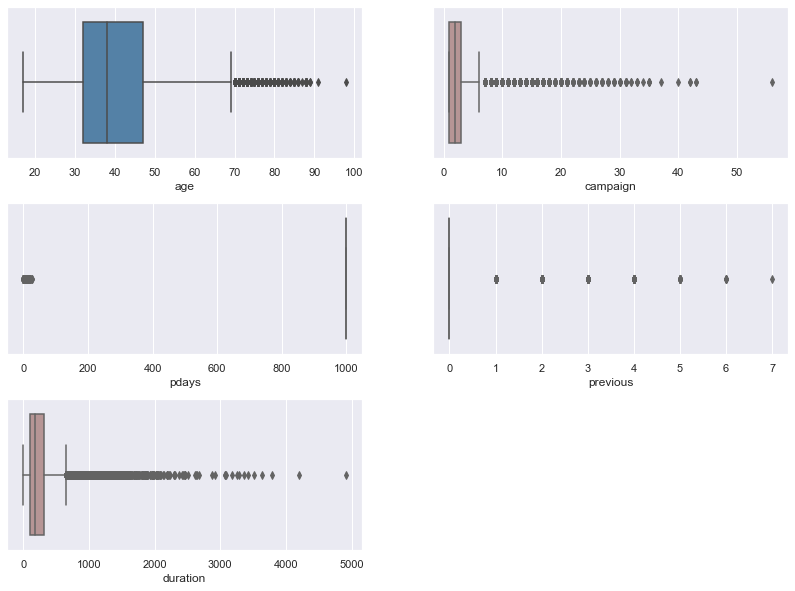

In [14]:
sns.set(rc={"figure.figsize": (14, 10)})
plt.subplots_adjust(hspace=0.3)

subplot(3,2,1)
sns.boxplot(data['age'], color= 'steelblue')

subplot(3,2,2)
sns.boxplot(data['campaign'], color = 'rosybrown')

subplot(3,2,3)
sns.boxplot(data['pdays'], color = 'rosybrown')

subplot(3,2,4)
sns.boxplot(data['previous'], color = 'rosybrown')

subplot(3,2,5)
sns.boxplot(data['duration'], color = 'rosybrown')

Detecting outliers by using Interquartile Range. 'pdays' and 'previous' features have not be considered in here. There is no distribution
These features will be removed next step.

In [5]:
for i in ['age',  'campaign','duration']:
    Q1 = data[i].quantile(0.25)        # first quartile
    Q3 = data[i].quantile(0.75)        # third quartile
    IQR = Q3-Q1                        # interquartile range
    smallest_value = Q1 - 1.5 * IQR
    largest_value = Q3 + 1.5 * IQR
    l = []
    for x in data[i]:
        if x >= smallest_value and x <=largest_value:
            l.append(x)
        else:
            l.append(np.nan)   # replace outliers with NaN
    data[i]=l

In [769]:
data.isnull().sum()

age             367
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration       2366
campaign       1916
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [6]:
# removing outliers
data.dropna(axis=0, inplace=True)

## Data Visualization

Visualizing categorical data

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.9y'),
  Text(1, 0, 'university.degree'),
  Text(2, 0, 'basic.4y'),
  Text(3, 0, 'high.school'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'basic.6y'),
  Text(7, 0, 'illiterate')])

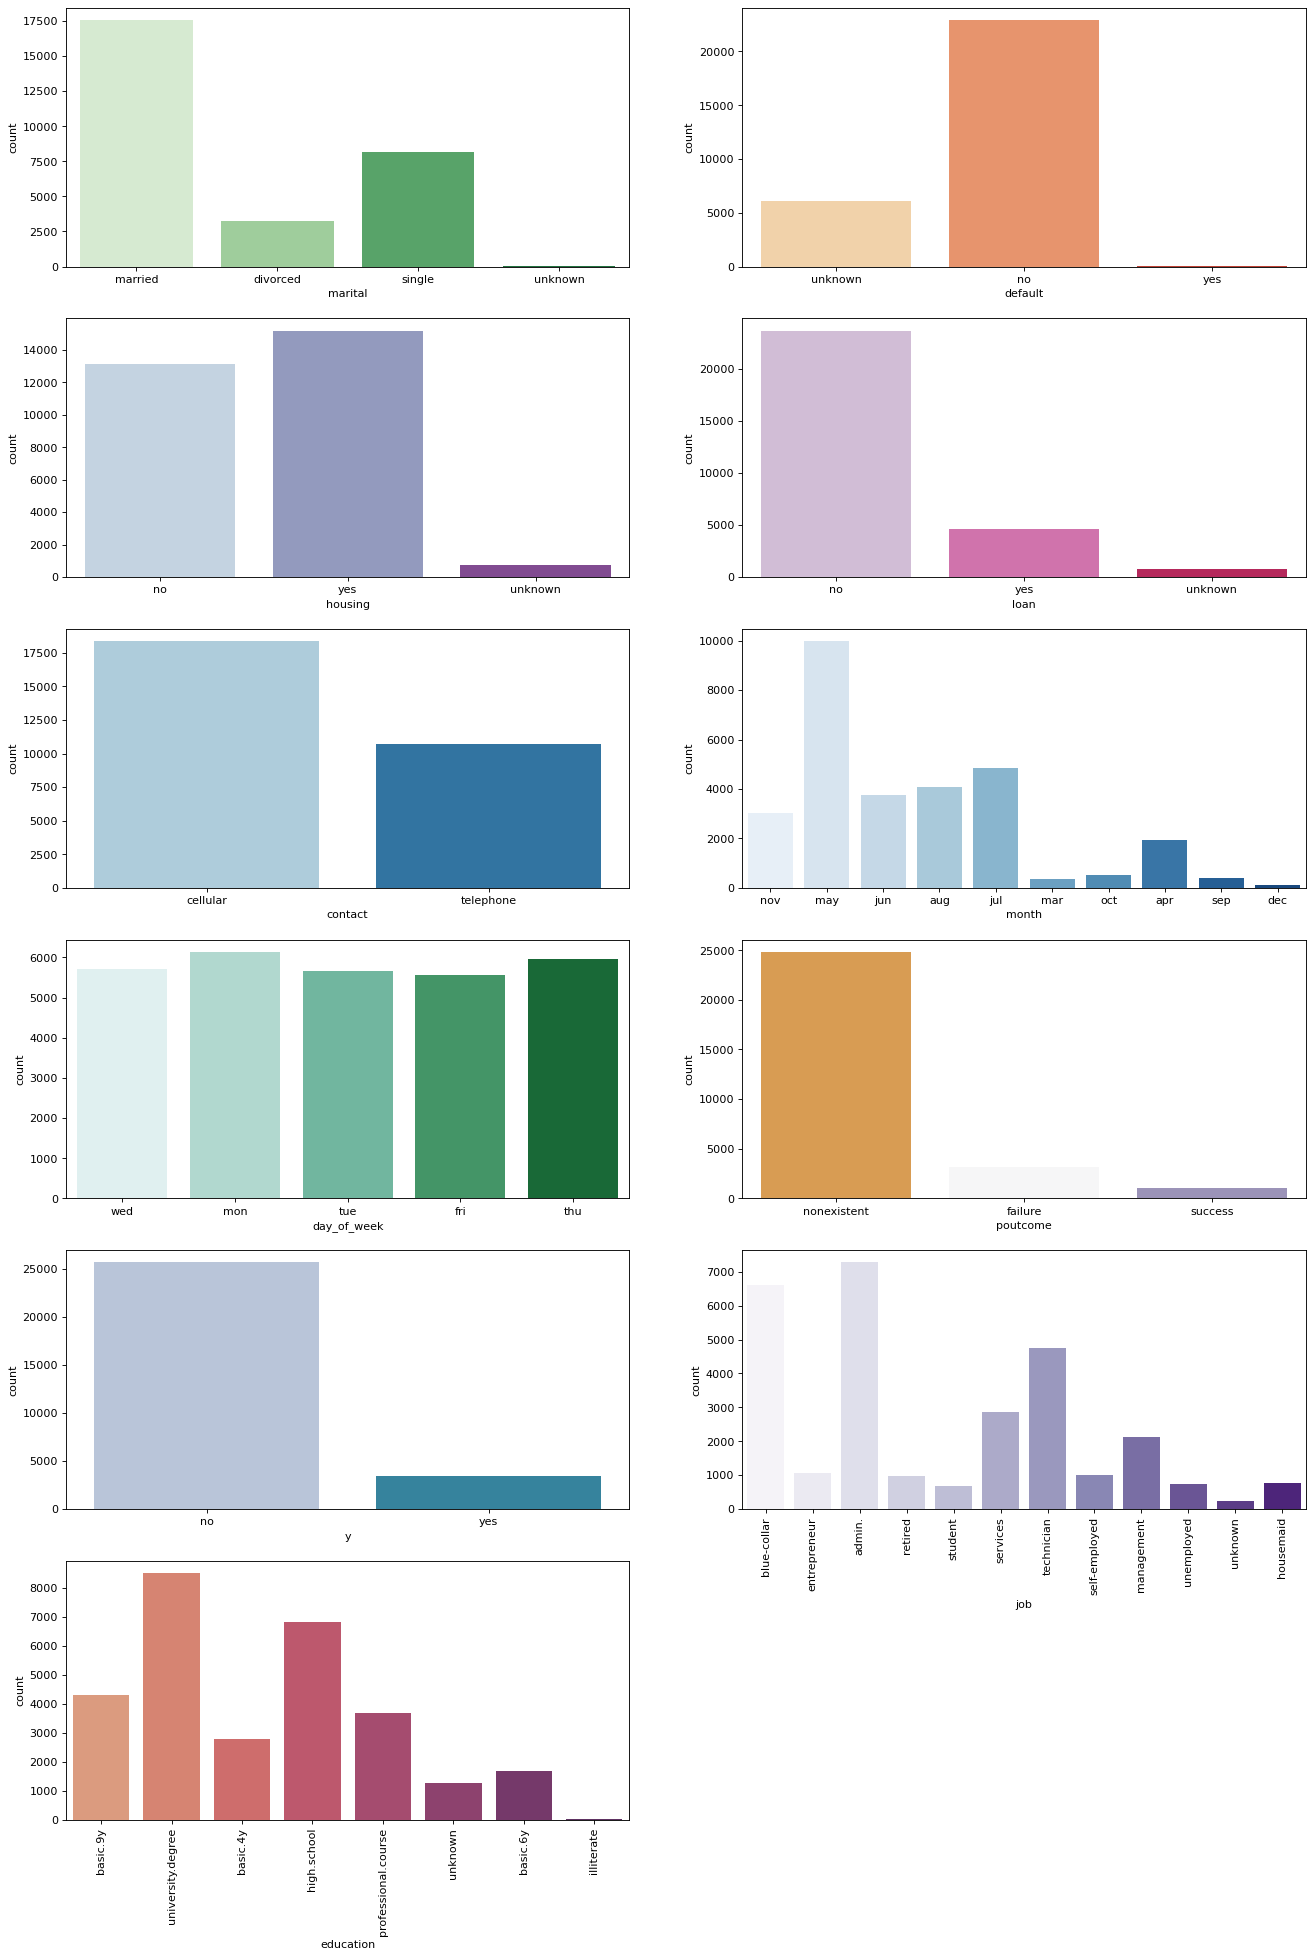

In [204]:
plt.figure(figsize=(20,30), dpi= 80)
plt.subplots_adjust(hspace=0.2)

subplot(6,2,1)
sns.countplot(data['marital'], palette = 'Greens')

subplot(6,2,2)
sns.countplot(data['default'], palette =  'OrRd')

subplot(6,2,3)
sns.countplot(data['housing'], palette= 'BuPu')

subplot(6,2,4)
sns.countplot(data['loan'], palette = 'PuRd')

subplot(6,2,5)
sns.countplot(data['contact'], palette = 'Paired')

subplot(6,2,6)
sns.countplot(data['month'], palette = 'Blues')

subplot(6,2,7)
sns.countplot(data['day_of_week'], palette = 'BuGn')

subplot(6,2,8)
sns.countplot(data['poutcome'], palette = 'PuOr')

subplot(6,2,9)
sns.countplot(data['y'], palette = 'PuBuGn')

subplot(6,2,10)
sns.countplot(data['job'], palette = 'Purples')
plt.xticks(rotation=90)

subplot(6,2,11)
sns.countplot(data['education'], palette = 'flare')
plt.xticks(rotation=90)


<AxesSubplot:xlabel='campaign', ylabel='count'>

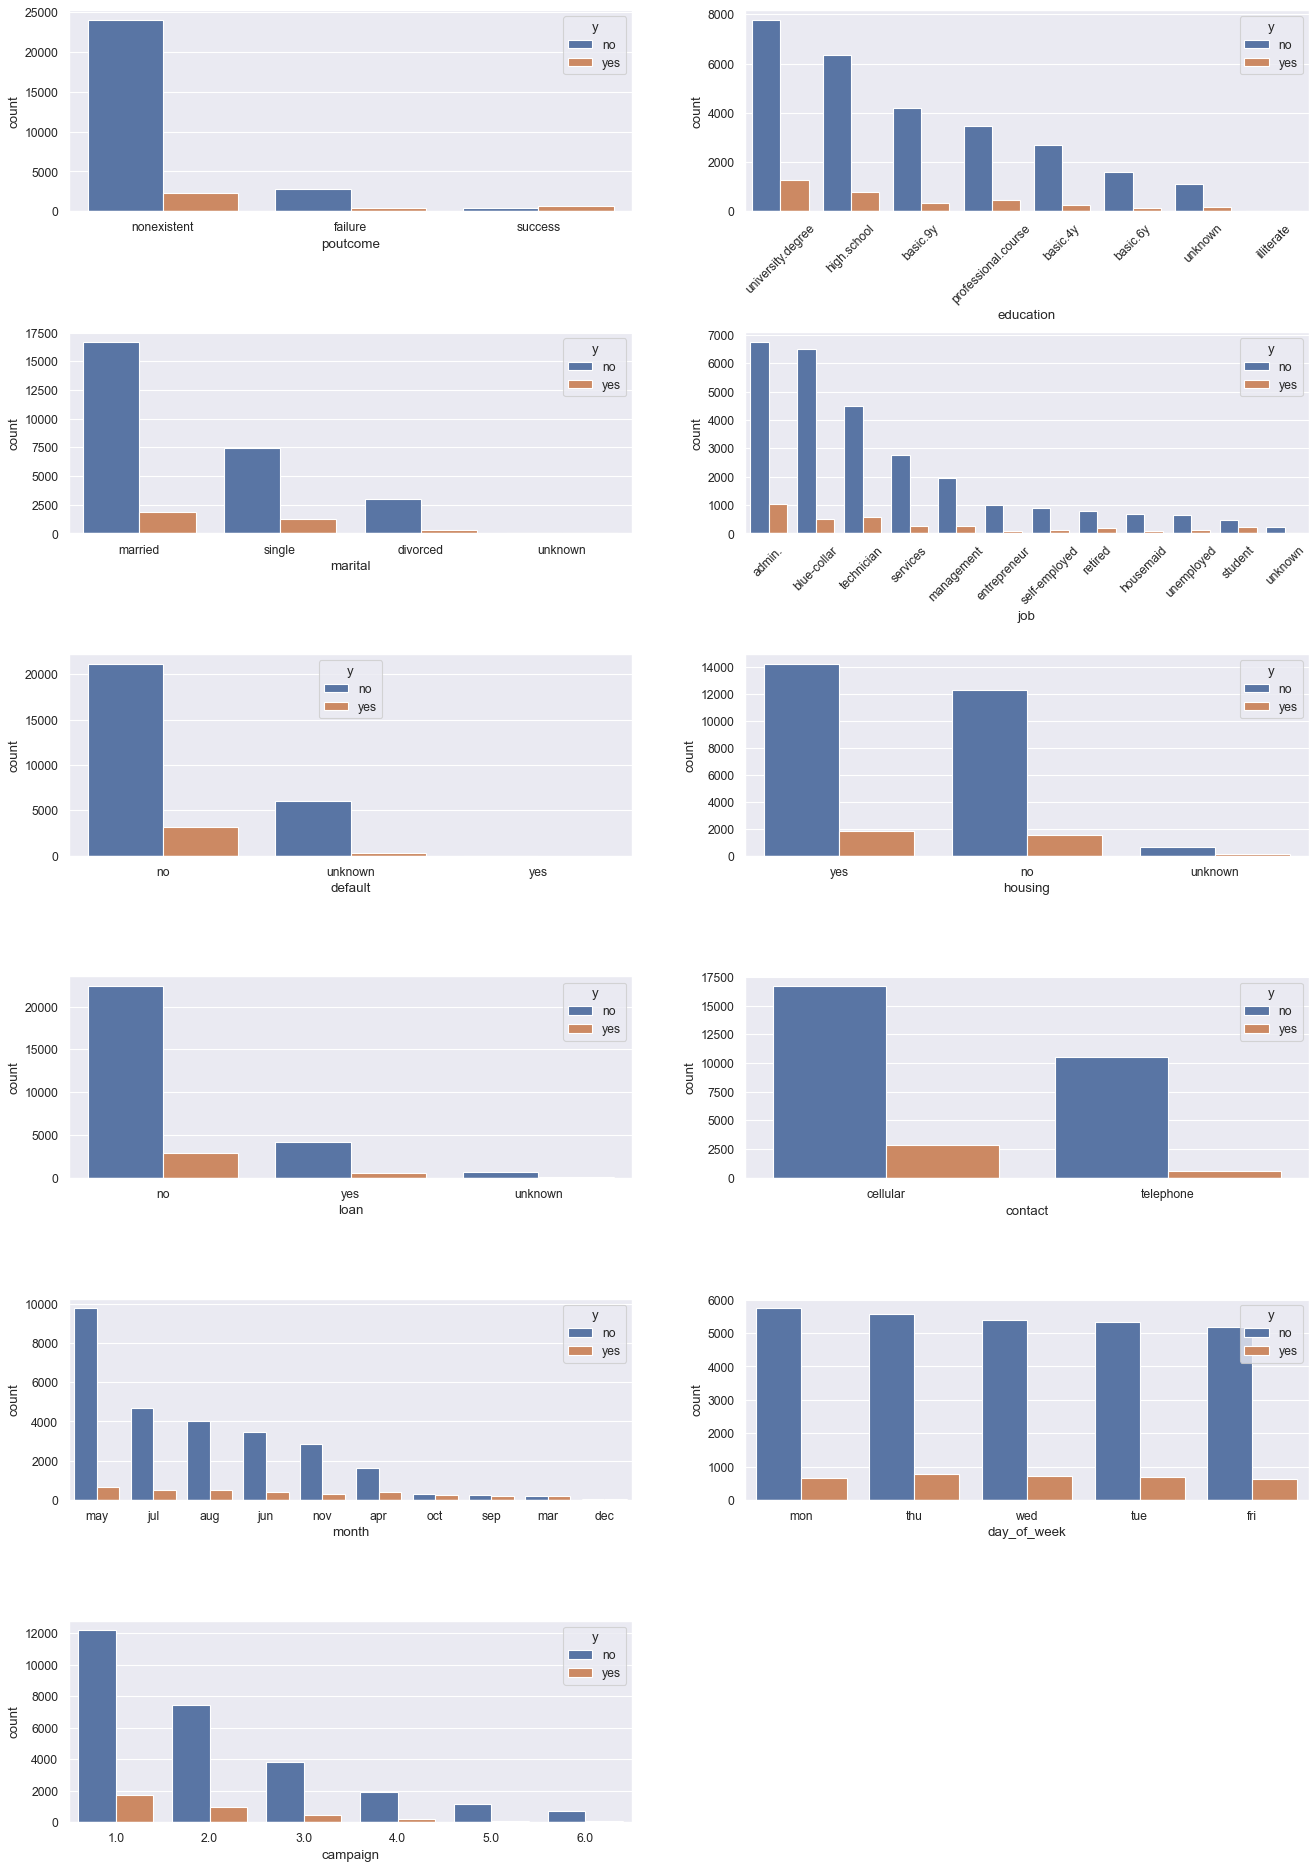

In [581]:
plt.figure(figsize=(20,30), dpi= 80)
plt.subplots_adjust(hspace=0.6)

subplot(6,2,1)
sns.set_theme(style='darkgrid')
sns.countplot(x="poutcome", data = data, hue = "y", order = data["poutcome"].value_counts().index)

subplot(6,2,2)
sns.countplot(x="education", data = data, hue = "y", order = data["education"].value_counts().index).tick_params(
axis='x', rotation=45)


subplot(6,2,3)
sns.countplot(x="marital", data = data, hue = "y", order = data["marital"].value_counts().index)

subplot(6,2,4)
sns.countplot(x="job", data = data, hue = "y", order = data["job"].value_counts().index).tick_params(
axis='x', rotation=45)

subplot(6,2,5)
sns.countplot(x="default", data = data, hue = "y", order = data["default"].value_counts().index)

subplot(6,2,6)
sns.countplot(x="housing", data = data, hue = "y", order = data["housing"].value_counts().index)

subplot(6,2,7)
sns.countplot(x="loan", data = data, hue = "y", order = data["loan"].value_counts().index)

subplot(6,2,8)
sns.countplot(x="contact", data = data, hue = "y", order = data["contact"].value_counts().index)

subplot(6,2,9)
sns.countplot(x="month", data = data, hue = "y", order = data["month"].value_counts().index)

subplot(6,2,10)
sns.countplot(x="day_of_week", data = data, hue = "y", order = data["day_of_week"].value_counts().index)

subplot(6,2,11)
sns.countplot(x="campaign", data = data, hue = "y", order = data["campaign"].value_counts().index)

Visualizing numerical data

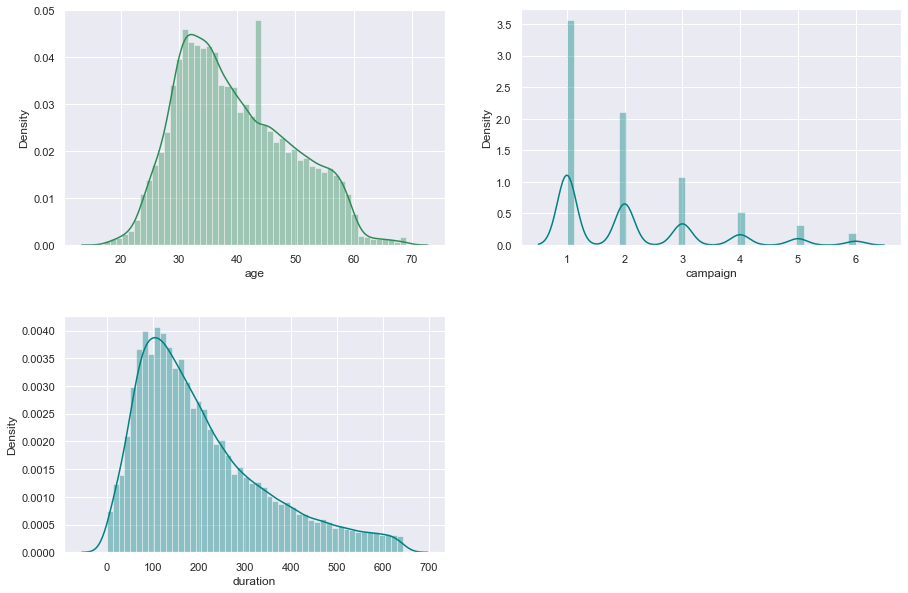

In [741]:
sns.set(rc={"figure.figsize": (15, 10)})
plt.subplots_adjust(hspace=0.3)
subplot(2,2,1)
                    
sns.distplot(data['age'], rug=False, hist=True, color = 'seagreen')

subplot(2,2,2)
sns.distplot(data['campaign'], rug=False, hist=True, color= 'teal')

subplot(2,2,3)
sns.distplot(data['duration'], rug=False, hist=True, color= 'teal')

plt.show()

<AxesSubplot:xlabel='y', ylabel='campaign'>

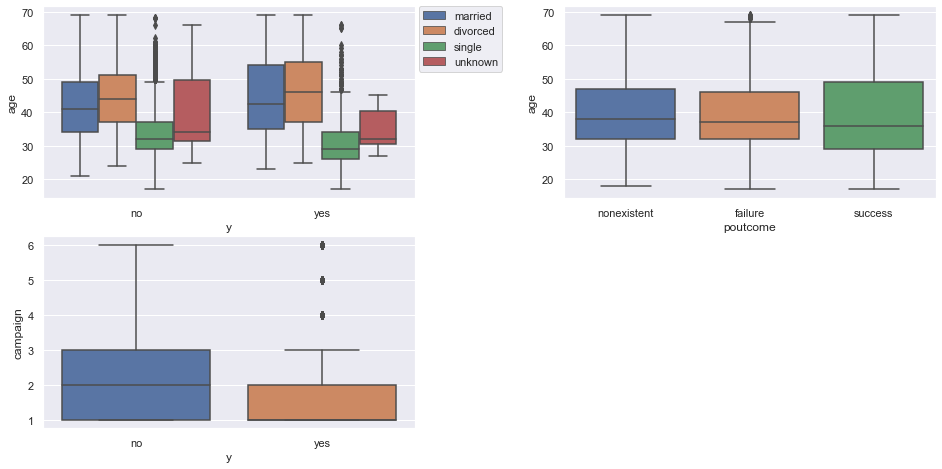

In [21]:
sns.set(rc={"figure.figsize": (16, 12)})
plt.subplots_adjust(hspace=0.2, wspace = 0.4 )

subplot(3,2,1)
sns.boxplot(x='y',y='age',data=data,hue='marital')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

subplot(3,2,2)
sns.boxplot(x='poutcome',y='age',data=data)

subplot(3,2,3)
sns.boxplot(x='y',y='campaign',data=data)

### Feature Selection

Countplots show that the target variable does not affect by 'day of the week'. And It seems like that, clients who have subscribed the term deposit have not changed by 'month'. So, these features have been removed. The explanation for other removed features have been given above.

In [271]:
data.drop(['previous', 'pdays', 'day_of_week', 'month'], axis= 1, inplace = True)

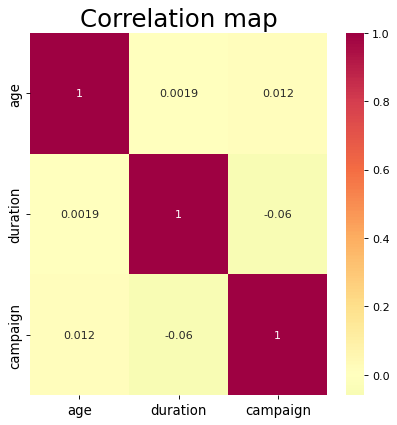

In [11]:
plt.figure(figsize=(6,6), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap = 'Spectral_r', center=0, annot=True)

plt.title('Correlation map', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Data Transformation

Encoding categorical data

In [272]:
categorical_data = data.drop(['age', 'campaign', 'duration'], axis = 1)

In [273]:
le=LabelEncoder()

In [274]:
data_encoded = categorical_data.apply(le.fit_transform)

In [275]:
# add numerical columns
for i in ['age', 'campaign', 'duration']:
    data_encoded[i] = data[i]

## 4. Preparation for Model Building

### Splitting Dataset into Train and Test Data 

In [276]:
# features
X = data_encoded.drop("y",axis=1)
# target
y = data_encoded["y"]

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

### Handling Imbalance Problem 

There is serious imbalance in values of target variable

In [278]:
# method - Random Oversampling Technique
ros = RandomOverSampler(sampling_strategy = 'minority',random_state = 42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

### Scaling Data for Handling Skewness

In [279]:
scaler = StandardScaler()   # Z-score(Standardization)

In [280]:
#scaling train
scaled_X_ros = pd.DataFrame(scaler.fit_transform(X_ros), columns = X_ros.columns, index=X_ros.index)

In [281]:
# scaling test
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index=X_test.index)

In [282]:
# changing categorical data to its encoded state
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'poutcome']

for i in categorical_columns:
    scaled_X_ros[i] = X_ros[i]
    scaled_X_test[i] = X_test[i]

### Model Comparison

In [249]:
models = [LogisticRegression(), DecisionTreeClassifier(), LinearSVC(random_state = 42), 
          RandomForestClassifier(random_state = 42), KNeighborsClassifier(), xgb.XGBClassifier()]

names = ['Logistic Regression', 'Decision Tree Classifier', 'Support Vector Classifier',
         'Random Forest Classifier', 'K-Nearest Neighbors', 'XGBoost Classifier']

accuracy = []
precision = []
recall = []
f1 = []
for model, name in zip(models, names):
    for score in ["accuracy", "precision", "recall", 'f1']:
        kfold = KFold(n_splits=10, shuffle = True, random_state=42)
        cv_result = cross_val_score(model, scaled_X_ros, y_ros, cv=kfold, scoring=score).mean()
        if score == 'accuracy':
            accuracy.append(cv_result)
        elif score == 'precision' :
            precision.append(cv_result)
        elif score == 'recall':
            recall.append(cv_result)
        else:
            f1.append(cv_result)
            
lists = list(zip(names, accuracy, precision, recall, f1))  
result = pd.DataFrame(lists, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1'], index = [1,2,3,4,5,6])
result

,Model,Accuracy,Precision,Recall,f1
1,Logistic Regression,0.629386,0.620242,0.667493,0.642914
2,Decision Tree Classifier,0.946399,0.902359,0.999358,0.948536
3,Support Vector Classifier,0.628536,0.617922,0.673374,0.644328
4,Random Forest Classifier,0.974600,0.952076,0.999497,0.975207
5,K-Nearest Neighbors,0.882601,0.818508,0.983308,0.893312
6,XGBoost Classifier,0.822134,0.836228,0.801101,0.818259


It seems that Random Forest Classifier has the highest accuracy score

## 5. Model Building


### Random Forest model with Default Parameters

In [19]:
model = RandomForestClassifier(random_state = 42)

In [20]:
model.fit(scaled_X_ros, y_ros)

RandomForestClassifier(random_state=42)

In [21]:
y_predictions = model.predict(scaled_X_test)

### Model Performance

In [22]:
print('Training score of model : ', model.score(scaled_X_ros, y_ros))

Training score of model :  1.0


In [23]:
print('Testing score of model : ', model.score(scaled_X_test, y_test))

Testing score of model :  0.9177215189873418


In [24]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7836
           1       0.49      0.30      0.38       696

    accuracy                           0.92      8532
   macro avg       0.72      0.64      0.67      8532
weighted avg       0.90      0.92      0.91      8532



[[7618  218]
 [ 484  212]]


Text(0.5, 48.29999999999998, 'Predicted label')

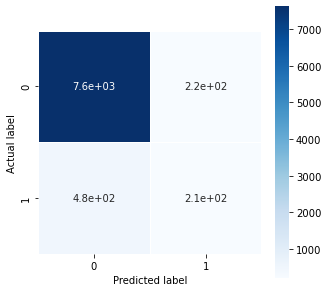

In [25]:
cm = confusion_matrix(y_test, y_predictions)
print(cm)
plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=1, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

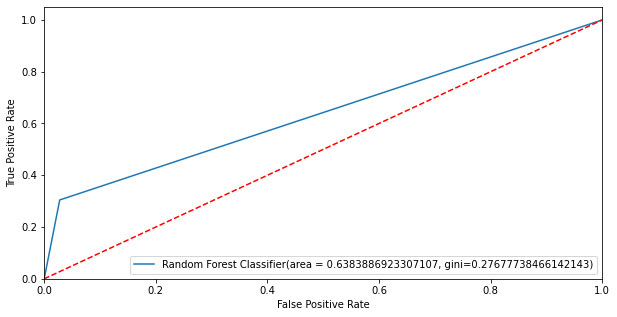

In [26]:
random_forest_roc_auc = roc_auc_score(y_test,y_predictions)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label=f'Random Forest Classifier(area = {random_forest_roc_auc}, gini={2*random_forest_roc_auc-1})')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## 6. Model Improvement

### Grid Search Hyperparameter Tuning for Random Forest Classifier

In [46]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [111]:
random_state = [42]
#Number of trees in random forest
n_estimators = [100, 200, 300]
# The maximum depth of the tree
max_depth = [5, 8]
# Minimum number of samples required for each leaf node
min_samples_leaf = [1, 2, 3]
# Number of features to consider at every split
max_features = [3, 5, 8]
# Minimum number of samples required to split a node
min_samples_split = [1,2, 5]
 
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'random_state' : random_state
               }

grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = 5, scoring = "accuracy")
grid_search.fit(scaled_X_ros, y_ros)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 8], 'max_features': [3, 5, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]},
             scoring='accuracy')

In [112]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

### Feature Importance

In [262]:
importances = grid_search.best_estimator_.feature_importances_
features = list(scaled_X_ros.columns)
feature_importance = sorted(zip(importances, features), reverse=True)

feature_importance_result = pd.DataFrame(feature_importance, columns=['Importance', 'Feature'])
feature_importance_result

,Importance,Feature
0,0.432562,duration
1,0.228470,poutcome
2,0.108684,contact
3,0.068845,default
4,0.066638,age
5,0.032158,education
6,0.023285,job
7,0.017104,marital
8,0.015843,campaign
9,0.003604,housing


Text(0.5, 0, 'Feature Importance')

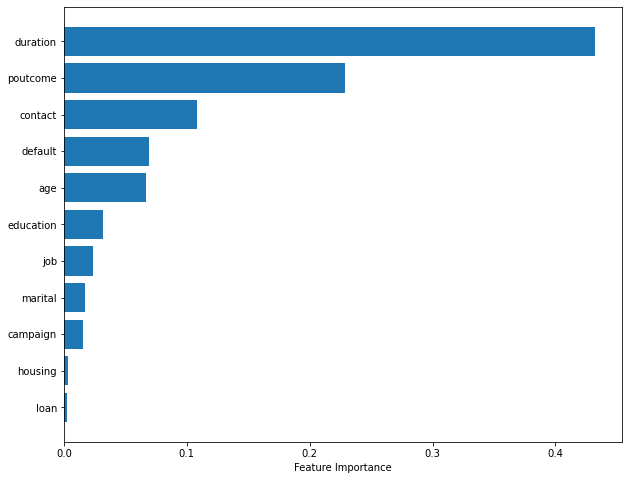

In [266]:
sorted_idx = grid_search.best_estimator_.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(scaled_X_ros.columns[sorted_idx], grid_search.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")

### Random Forest Classifier with Best Parameters and Top 9 Features

In [283]:
scaled_X_ros.drop(['loan','housing'], axis = 1, inplace = True)

scaled_X_test.drop(['loan', 'housing'], axis = 1, inplace = True)

In [284]:
tuned_model = RandomForestClassifier(max_depth = 8, max_features = 3, min_samples_leaf = 1, 
                                         min_samples_split = 2, n_estimators = 100, random_state = 42)

In [285]:
tuned_model.fit(scaled_X_ros, y_ros)

RandomForestClassifier(max_depth=8, max_features=3, random_state=42)

In [286]:
y_predictions = tuned_model.predict(scaled_X_test)

### Model Performance

In [287]:
print('Training score of model : ', tuned_model.score(scaled_X_ros, y_ros))

Training score of model :  0.8332330580320516


In [288]:
print('Testing score of model : ', tuned_model.score(scaled_X_test, y_test))

Testing score of model :  0.7926629160806375


In [289]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      7836
           1       0.25      0.80      0.39       696

    accuracy                           0.79      8532
   macro avg       0.62      0.79      0.63      8532
weighted avg       0.92      0.79      0.84      8532



[[6209 1627]
 [ 142  554]]


Text(0.5, 48.29999999999998, 'Predicted label')

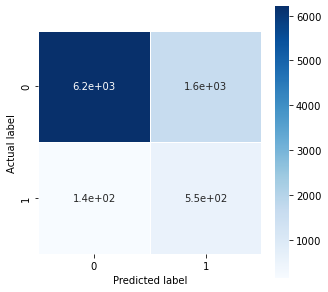

In [290]:
cm = confusion_matrix(y_test, y_predictions)
print(cm)
plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=1, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

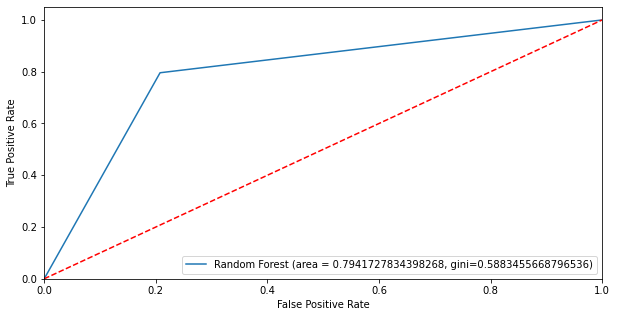

In [291]:
random_forest_roc_auc = roc_auc_score(y_test,y_predictions)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label=f'Random Forest (area = {random_forest_roc_auc}, gini={2*random_forest_roc_auc-1})')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()